# Band to band regression
This notebook reads the batch exported geotiff file of paried Landsat 9 and Landsat 8 images and convert the pixel values to vaex dataframe.
Both Ordinary Least Square (OLS) Regression Model and Reduced Major Axis Regression (RMA) Model.
RMA was calculated using the python package from https://github.com/OceanOptics/pylr2.

Users will need to change the input and output folder. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #, r2_score
from scipy import stats
import seaborn as sns
import vaex as vx
from pylr2.regress2 import regress2
from geopyfsn import getBand

In [2]:
sns.set_theme(style="darkgrid", font="Arial")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

blue

In [11]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/blue"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


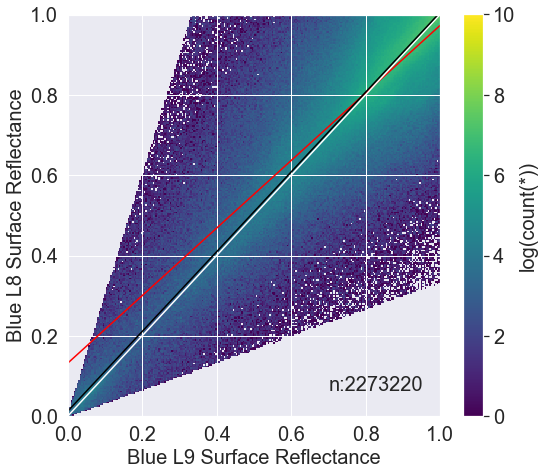

OLS: 
y=0.8409x+0.1319
OLS_r:0.85, p:0.000, n:2273220
RMA: 
y=0.9929x+0.0123
RMA_r:0.85
RMSE is 0.1068


In [12]:

# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )
# scatter plot  
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10,
    xlabel='Blue L9 Surface Reflectance', ylabel='Blue L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig('print/L9L8/Blue.jpg', dpi=300)

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))

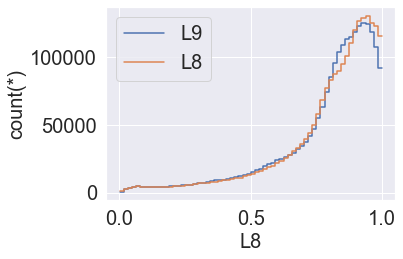

In [5]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

green

In [6]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/green"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8


/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


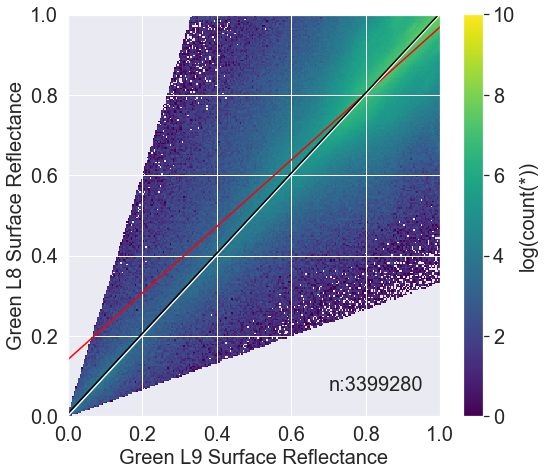

OLS: 
y=0.8284x+0.1405
OLS_r:0.83, p:0.000, n:3399280
RMA: 
y=0.9979x+0.0060
RMA_r:0.83
RMSE is 0.1032


In [7]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Arial"

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=10, 
    xlabel='Green L9 Surface Reflectance', ylabel='Green L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L9L8/Green.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))


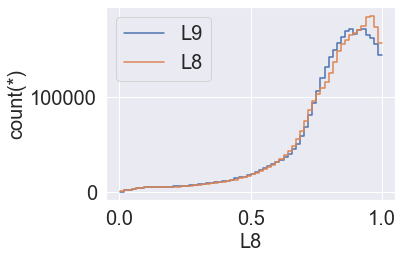

In [8]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

red

In [9]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/red"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8

AttributeError: 'Annotation' object has no property 'vmin'

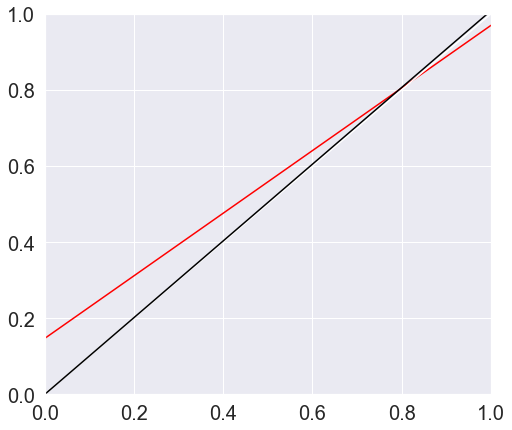

In [10]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data', vmin=0.0, vmax=10,
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", 
    xlabel='Red L9 Surface Reflectance', ylabel='Red L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L9L8/Red.jpg', dpi=300) 

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))


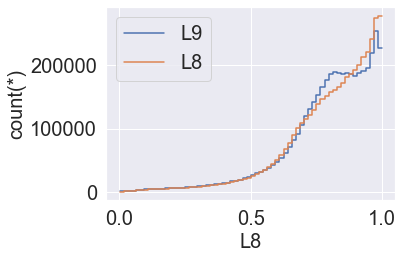

In [ ]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

nir

In [ ]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/nir"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


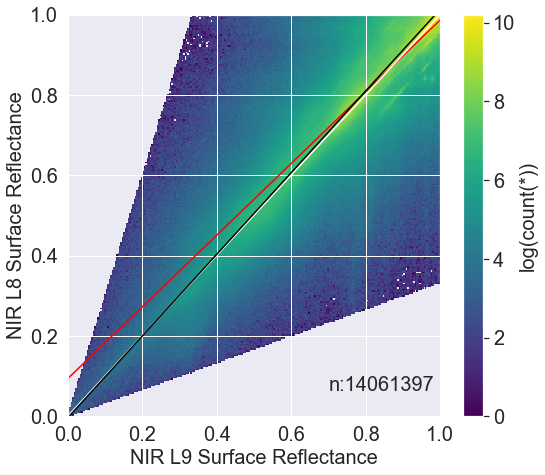

OLS: 
y=0.8928x+0.0933
OLS_r:0.88, p:0.000, n:14061397
RMA: 
y=1.0168x+-0.0041
RMA_r:0.88
RMSE is 0.0877


In [ ]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data', vmin=0.0, vmax=10,
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", 
    xlabel='NIR L9 Surface Reflectance', ylabel='NIR L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig(r'print/L9L8/Nir.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))


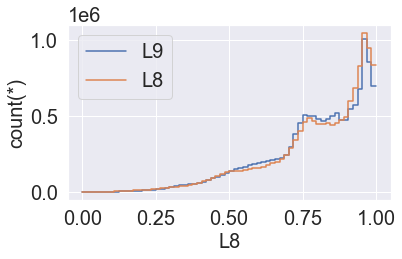

In [ ]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir1

In [ ]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/swir1"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


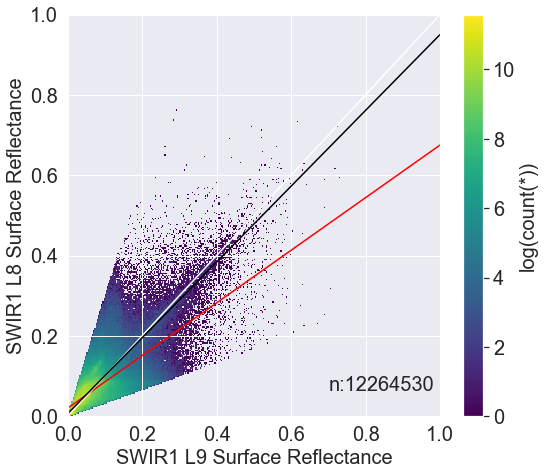

OLS: 
y=0.6550x+0.0202
OLS_r:0.69, p:0.000, n:12264530
RMA: 
y=0.9437x+0.0064
RMA_r:0.69
RMSE is 0.0257


In [ ]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data', vmin=0.0, vmax=10,
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", 
    xlabel='SWIR1 L9 Surface Reflectance', ylabel='SWIR1 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L9L8/SWIR1.jpg', dpi=300)  

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))


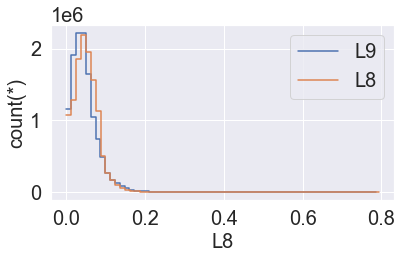

In [ ]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir2

In [ ]:
folderPath = r"/data/shunan/data/harmonize_data/202205_08landsat/swir2"
L8, L9 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L9': L9})
df = vx.from_pandas(df)
del L9,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


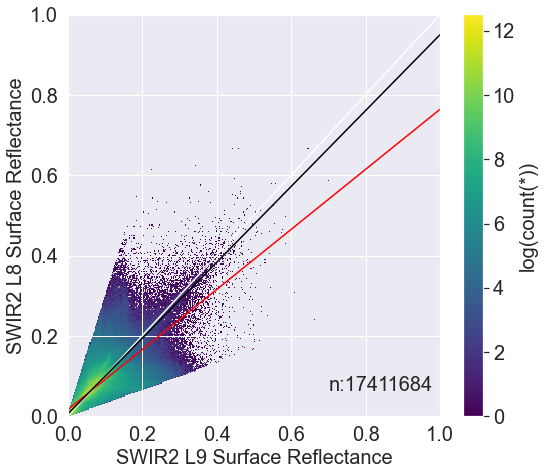

OLS: 
y=0.7479x+0.0162
OLS_r:0.79, p:0.000, n:17411684
RMA: 
y=0.9449x+0.0049
RMA_r:0.79
RMSE is 0.0248


In [ ]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L9.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L9.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L9.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data', vmin=0.0, vmax=10,
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L9, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", 
    xlabel='SWIR2 L9 Surface Reflectance', ylabel='SWIR2 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L9L8/SWIR2.jpg', dpi=300)      

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L9.values, squared=False)))


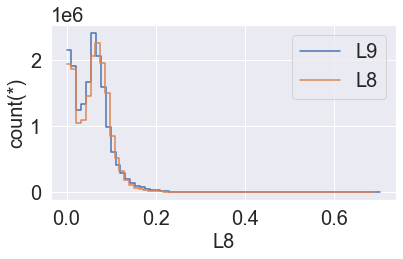

In [ ]:
df.viz.histogram(x=df.L9, label='L9')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()